In [80]:
%matplotlib inline
import pprint
import random
import numpy as np
from scipy.stats import norm
from scipy.stats import beta
import matplotlib.pyplot as plt

Simple intros [here](https://www.chrisstucchio.com/blog/2013/bayesian_bandit.html) and [here](https://lazyprogrammer.me/bayesian-bandit-tutorial/) and [here](https://stats.stackexchange.com/questions/237037/bayesian-updating-with-new-data) and [here](https://medium.com/@siddharth.1729_65206/of-bandits-and-bidding-26b6109d5d9d)

# A simple bayesian updating on a normal distribution

No handles with labels found to put in legend.


[2.97691042 7.18951662 6.22885156 5.2347527  6.41340456 5.50714424
 3.50569059 2.21471128 5.22446867 6.18125559]


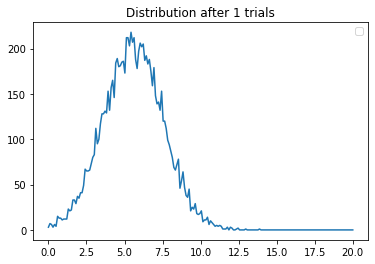

No handles with labels found to put in legend.


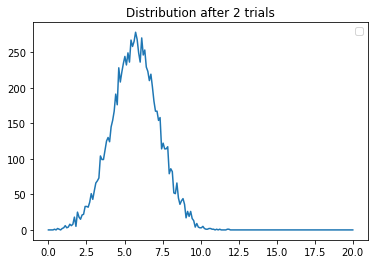

No handles with labels found to put in legend.


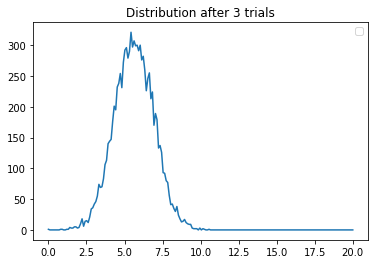

No handles with labels found to put in legend.


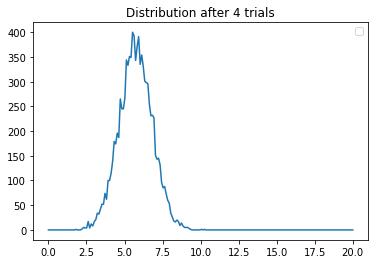

No handles with labels found to put in legend.


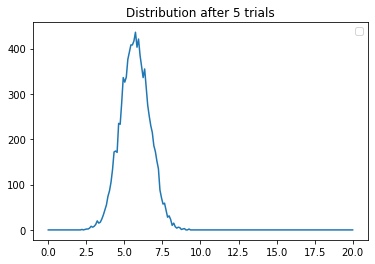

No handles with labels found to put in legend.


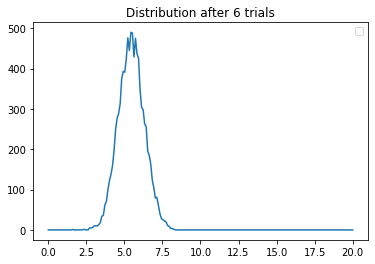

No handles with labels found to put in legend.


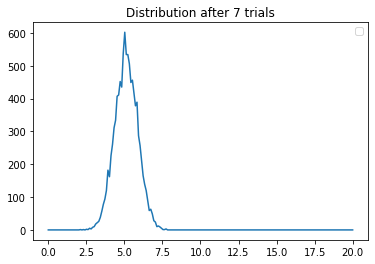

No handles with labels found to put in legend.


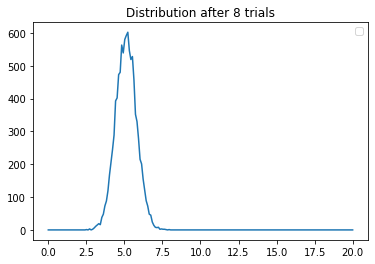

No handles with labels found to put in legend.


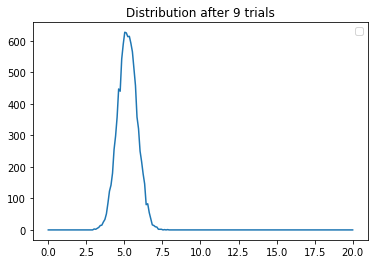

In [111]:
trials = 10
nb_draws = 10000
nb_bins = 200
random.seed(42)
mu = [0] * trials
sigma = [0] * trials
results = []
lower = 0.0
upper = 20.0

mu[0] = 5
sigma[0] = 2.7

def plot(y, nb_bins, lower, upper, title):
    x = np.linspace(lower, upper, nb_bins)
    plt.plot(x, y)
    plt.title(title)
    plt.legend()
    plt.show()

def sort_into_bins(draws, nb_bins, lower, upper):
    a, b = np.histogram(draws, bins=nb_bins, range=(lower, upper))
    return a
                   
# draw some realized prices (from true distribution)
realized_prices = np.random.normal(mu[0], sigma[0], trials)
print(realized_prices)
    
for i in range(1, trials):
    mu[i] = (sigma[i-1] * realized_prices[i] + (sigma_0 ** 2) * mu[i-1]) / (sigma[i-1] + sigma_0 ** 2)
    sigma[i] = (sigma[i-1] * sigma_0 ** 2) / (sigma[i-1] + sigma_0 ** 2)
    draws = np.random.normal(mu[i], sigma[i], nb_draws)
    y = sort_into_bins(draws, nb_bins, lower, upper)
    results.append(y)
    title = "Distribution after %s trials" % i
    plot(y, nb_bins, lower, upper, title)


No handles with labels found to put in legend.


[-13.31648318   8.05037347  15.61801635  13.95323326]


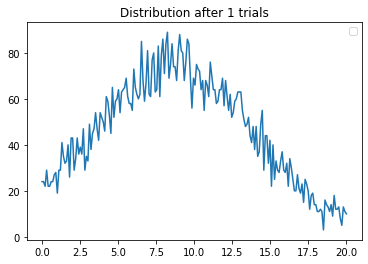

No handles with labels found to put in legend.


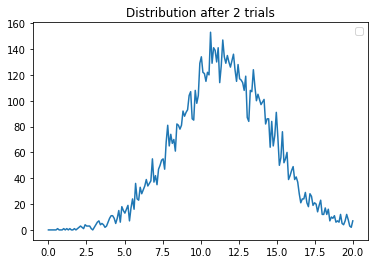

No handles with labels found to put in legend.


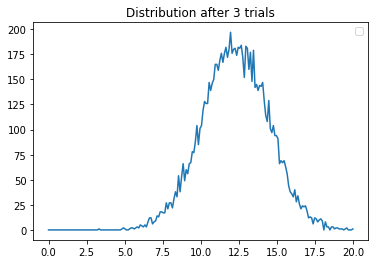

In [121]:
trials = 4
nb_draws = 10000
nb_bins = 200
random.seed(42)
mu = [0] * trials
sigma = [0] * trials
results = []
lower = 0.0
upper = 20.0

mu[0] = 10
sigma[0] = 20

def plot(y, nb_bins, lower, upper, title):
    x = np.linspace(lower, upper, nb_bins)
    plt.plot(x, y)
    plt.title(title)
    plt.legend()
    plt.show()

def sort_into_bins(draws, nb_bins, lower, upper):
    a, b = np.histogram(draws, bins=nb_bins, range=(lower, upper))
    return a
                   
# draw some realized prices (from true distribution)
realized_prices = np.random.normal(mu[0], sigma[0], trials)
print(realized_prices)
    
for i in range(1, trials):
    mu[i] = (sigma[i-1] * realized_prices[i] + (sigma_0 ** 2) * mu[i-1]) / (sigma[i-1] + sigma_0 ** 2)
    sigma[i] = (sigma[i-1] * sigma_0 ** 2) / (sigma[i-1] + sigma_0 ** 2)
    draws = np.random.normal(mu[i], sigma[i], nb_draws)
    y = sort_into_bins(draws, nb_bins, lower, upper)
    results.append(y)
    title = "Distribution after %s trials" % i
    if i % 100:
        plot(y, nb_bins, lower, upper, title)

In [82]:
np.random.random() < 1

True

# Multi-armed Bayesian Bandit

In [105]:
NUM_TRIALS = 2000
PRICE_BINS = [i for i in range(11)]
INITIAL_BANDIT_PROBABILITIES = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1]


class Bandit(object):
    def __init__(self, price, initial_probability):
        self.price = price
        self.probability = initial_probability
        self.a = 1
        self.b = 1

    def pull(self):
        return np.random.random() < self.probability

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x

In [106]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for bandit in bandits:
        y = beta.pdf(x, bandit.a, bandit.b)
        plt.plot(x, y, label="real p: %.4f" % bandit.price)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()

current samples: ['0.2273', '0.1059', '0.6587', '0.9660', '0.3375', '0.0445', '0.8111', '0.9006', '0.0623', '0.8848', '0.1235']


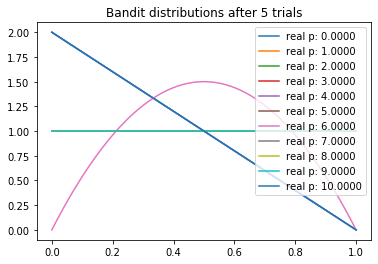

current samples: ['0.0589', '0.9657', '0.5808', '0.1046', '0.3214', '0.8243', '0.1545', '0.1495', '0.6200', '0.4095', '0.1617']


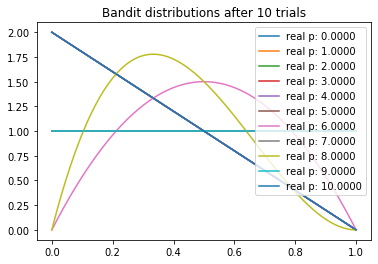

current samples: ['0.1809', '0.7592', '0.4346', '0.5285', '0.1465', '0.4768', '0.5812', '0.6056', '0.2501', '0.8556', '0.5079']


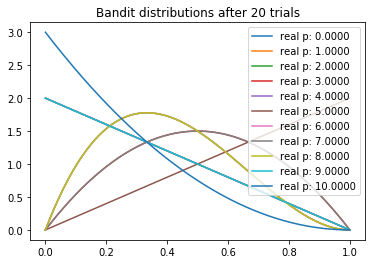

current samples: ['0.2186', '0.0724', '0.2323', '0.6699', '0.1166', '0.4289', '0.6348', '0.3440', '0.3932', '0.1704', '0.0515']


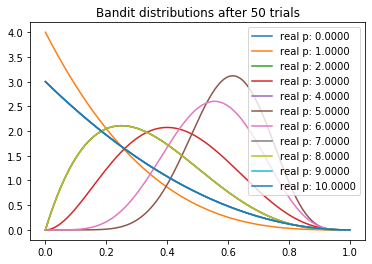

current samples: ['0.3172', '0.3090', '0.2969', '0.2118', '0.3124', '0.7383', '0.3487', '0.2972', '0.3775', '0.0578', '0.0223']


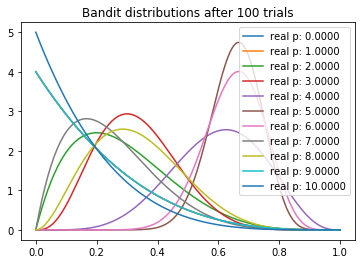

current samples: ['0.3695', '0.3328', '0.1332', '0.4580', '0.5309', '0.6593', '0.6750', '0.3376', '0.2889', '0.4296', '0.1043']


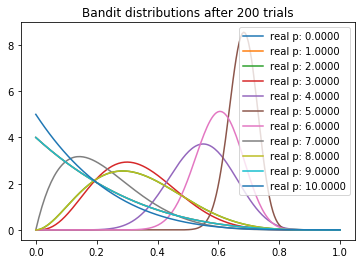

current samples: ['0.1687', '0.2221', '0.2390', '0.3064', '0.4024', '0.7236', '0.6025', '0.2979', '0.2835', '0.0017', '0.0646']


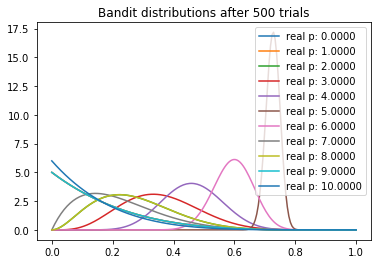

current samples: ['0.0021', '0.0114', '0.3594', '0.1764', '0.4783', '0.7026', '0.6513', '0.4863', '0.4118', '0.2657', '0.1191']


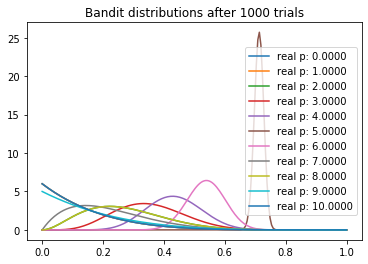

current samples: ['0.2151', '0.7071', '0.2313', '0.3656', '0.5383', '0.6681', '0.5305', '0.3657', '0.3428', '0.0331', '0.1423']


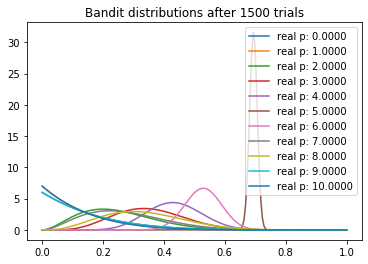

current samples: ['0.4069', '0.0503', '0.1500', '0.2658', '0.4876', '0.6985', '0.5394', '0.1703', '0.2946', '0.2619', '0.2237']


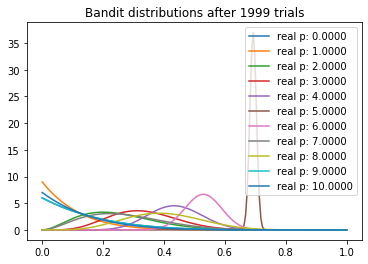

In [107]:
def experiment():
    bandits = [Bandit(price, initial_probability) for price, initial_probability in zip(PRICE_BINS, INITIAL_BANDIT_PROBABILITIES)]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(NUM_TRIALS):
        # take a sample from each bandit
        bestbandit = None
        maxsample = -1
        allsamples = [] # let's collect these just to print for debugging
        for bandit in bandits:
            sample = bandit.sample()
            allsamples.append("%.4f" % sample)
            if sample > maxsample:
                maxsample = sample
                bestbandit = bandit
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bestbandit.pull()

        # update the distribution for the bandit whose arm we just pulled
        bestbandit.update(x)

experiment()

## Correlated bandits

current samples: ['0.7912', '0.9372', '0.4886', '0.5836', '0.1346', '0.4754', '0.3209', '0.0265', '0.0440', '0.3322', '0.2014']
average price: 3.2399541184888445


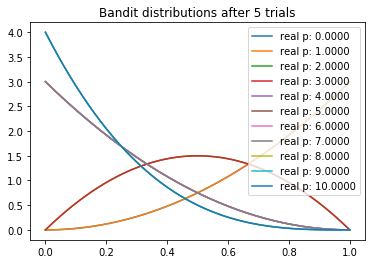

current samples: ['0.5672', '0.2947', '0.1612', '0.4794', '0.1876', '0.0401', '0.2285', '0.0835', '0.2001', '0.0107', '0.2137']
average price: 3.5659149447021075


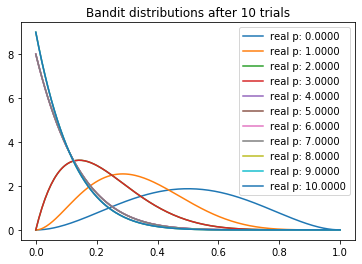

current samples: ['0.1697', '0.2084', '0.0252', '0.2037', '0.1192', '0.0516', '0.0382', '0.0032', '0.0015', '0.0653', '0.0688']
average price: 3.292883924857971


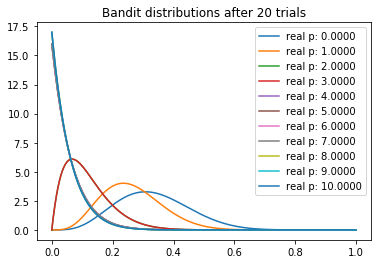

current samples: ['0.2273', '0.1455', '0.0290', '0.0733', '0.0145', '0.0104', '0.0010', '0.0254', '0.0197', '0.0010', '0.0172']
average price: 1.8712363668135212


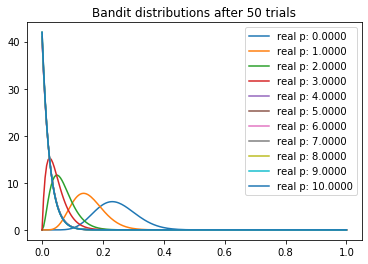

current samples: ['0.1128', '0.0798', '0.0260', '0.0324', '0.0133', '0.0088', '0.0033', '0.0258', '0.0166', '0.0041', '0.0173']
average price: 2.5558326515437355


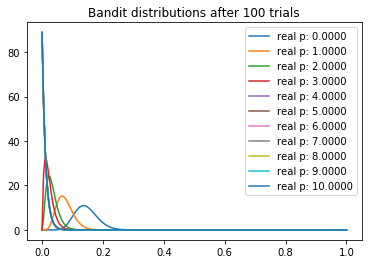

current samples: ['0.1210', '0.0291', '0.0150', '0.0080', '0.0034', '0.0046', '0.0040', '0.0185', '0.0010', '0.0005', '0.0121']
average price: 1.8693189168781554


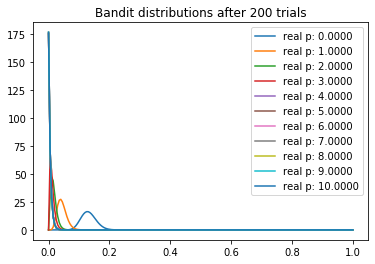

current samples: ['0.1296', '0.0144', '0.0017', '0.0011', '0.0013', '0.0044', '0.0011', '0.0003', '0.0008', '0.0071', '0.0030']
average price: 0.9544497905829283


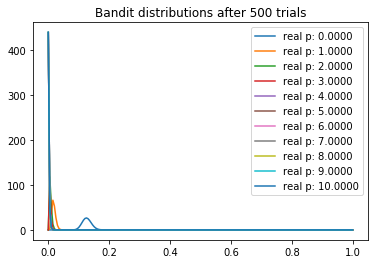

current samples: ['0.1224', '0.0050', '0.0027', '0.0017', '0.0011', '0.0002', '0.0001', '0.0002', '0.0005', '0.0004', '0.0004']
average price: 0.2544254382738902


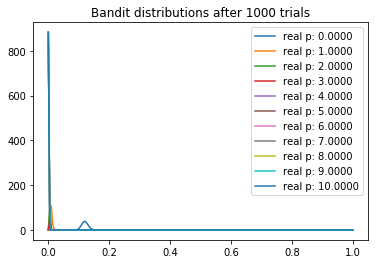

current samples: ['0.1140', '0.0039', '0.0035', '0.0003', '0.0005', '0.0000', '0.0000', '0.0015', '0.0005', '0.0013', '0.0003']
average price: 0.33929343433234066


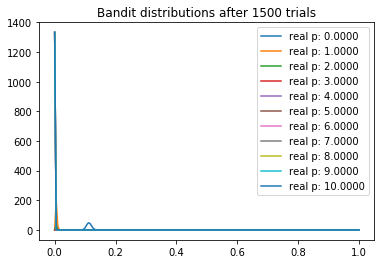

current samples: ['0.1122', '0.0048', '0.0015', '0.0009', '0.0005', '0.0003', '0.0003', '0.0003', '0.0001', '0.0004', '0.0000']
average price: 0.1872785070176138


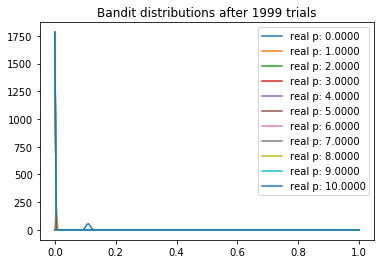

In [109]:
NUM_TRIALS = 2000
PRICE_BINS = [i for i in range(11)]
INITIAL_BANDIT_PROBABILITIES = [0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 0.5, 0.4, 0.3, 0.2, 0.1] #[0.9, 0.8, 0.8, 0.7, 0.6, 0.5, 0.5, 0.4, 0.3, 0.2, 0.1]


class Bandit2(object):
    def __init__(self, price, initial_probability):
        self.price = price
        self.probability = initial_probability
        self.a = 1
        self.b = 1

    def pull(self):
        return np.random.random() < self.probability

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x

def experiment2():
    bandits = [Bandit2(price, initial_probability) for price, initial_probability in zip(PRICE_BINS, INITIAL_BANDIT_PROBABILITIES)]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    for i in range(NUM_TRIALS):
        # take a sample from each bandit
        bestbandit = None
        maxsample = -1
        allsamples_f = []
        allsamples = [] # let's collect these just to print for debugging
        for bandit in bandits:
            sample = bandit.sample()
            allsamples.append("%.4f" % sample)
            allsamples_f.append(sample)
            if sample > maxsample:
                maxsample = sample
                bestbandit = bandit
        if i in sample_points:
            avg_price = 0.0
            prob = 0.0
            for sample, bandit in zip(allsamples_f, bandits):
                prob += sample
                avg_price += sample * bandit.price
            avg_price = avg_price / prob
            print("current samples: %s" % allsamples)
            print("average price: %s" % avg_price)
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bestbandit.pull()

        if x:
            for bandit in bandits:
                if bandit.price < bestbandit.price:
                    bandit.update(x)
        else:
            for bandit in bandits:
                if bandit.price > bestbandit.price:
                    bandit.update(x)

        # update the distribution for the bandit whose arm we just pulled
        bestbandit.update(x)

experiment2()     

In [124]:
[i/10 for i in range(201)]

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0,
 10.1,
 10.2,
 10.3,
 10.4,
 10.5,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.1,
 11.2,
 11.3,
 11.4,
 11.5,
 11.6,
 11.7,
 11.8,
 11.9,
 12.0,
 12.1,
 12.2,
 12.3,
 12.4,
 12.5,
 12.6,
 12.7,
 12.8,
 12.9,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 13.9,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.7,
 14.8,
 14.9,
 15.0,
 15.1,
 15.2,
 15.3,
 15.4,
 15.5,
 15.6,
 